In [242]:
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
import liyc_utils
import imp
imp.reload(liyc_utils)
from liyc_utils import *

In [243]:
# get all PE3 data
Anzalone_PE3 = pd.read_csv("../Anzalone_2019.feature_matrix.csv",index_col=0)
Anzalone_PE3 = Anzalone_PE3[~Anzalone_PE3.nick_to_pegRNA.isnull()]

In [244]:
Anzalone_PE3.describe()

,Target,0,1,2,3,4,5,6,7,8,9,cas9_score,nick_to_pegRNA,dPAM,PE3b,RTT_GC,RTT_length,PBS_GC,PBS_length,N_subsitution,N_deletion,N_insertions,Target_pos,Target_end_flank
count,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000
mean,32.885562,0.509806,0.348948,0.379467,0.239865,0.204709,0.253362,0.251579,0.250064,0.214364,0.258311,55.971590,54.794964,0.435252,0.025180,0.510511,16.996403,0.568185,13.187050,0.723022,1.384892,0.223022,4.517986,12.093525
std,16.351292,0.338998,0.249098,0.256084,0.245921,0.247529,0.250951,0.267832,0.235522,0.203805,0.223279,12.425913,31.560458,0.496684,0.156954,0.088214,6.449189,0.109695,1.583162,0.508671,5.558945,1.231612,4.039252,5.481037
min,0.021753,0.000000,0.000000,0.010988,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.568000,-116.000000,0.000000,0.000000,0.312500,9.000000,0.333333,8.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,22.604115,0.175532,0.161508,0.159301,0.052276,0.024652,0.061190,0.052321,0.058334,0.055772,0.078387,52.230000,48.000000,0.000000,0.000000,0.444444,13.000000,0.533333,13.000000,0.000000,0.000000,0.000000,2.000000,9.000000
50%,31.702644,0.582815,0.282168,0.323914,0.149251,0.093681,0.172034,0.137065,0.142497,0.132234,0.193846,60.384000,56.000000,0.000000,0.000000,0.500000,16.000000,0.615385,13.000000,1.000000,0.000000,0.000000,4.000000,11.000000
75%,44.399103,0.798564,0.454423,0.518647,0.324655,0.301926,0.385758,0.376821,0.441531,0.352221,0.391571,63.265000,72.000000,1.000000,0.000000,0.571429,20.000000,0.615385,14.000000,1.000000,1.000000,0.000000,5.000000,15.000000
max,79.380368,0.995182,0.965604,0.936812,0.900876,0.935165,0.973888,0.996603,0.972911,0.990019,0.892858,69.541000,95.000000,1.000000,1.000000,0.789474,52.000000,0.833333,15.000000,3.000000,80.000000,18.000000,33.000000,33.000000


In [245]:
Anzalone_PE3.corr()

,Target,0,1,2,3,4,5,6,7,8,9,cas9_score,nick_to_pegRNA,dPAM,PE3b,RTT_GC,RTT_length,PBS_GC,PBS_length,N_subsitution,N_deletion,N_insertions,Target_pos,Target_end_flank
Target,1.000000,-0.088832,-0.241579,-0.177559,-0.254367,-0.296403,-0.053475,-0.122664,-0.071828,-0.087576,-0.102945,0.288440,0.251400,0.181659,0.012408,0.125176,0.097149,-0.050458,0.165113,0.276440,0.032072,0.184265,-0.133273,0.131697
0,-0.088832,1.000000,0.210379,-0.041446,-0.010646,0.085782,-0.084966,-0.066486,0.029112,0.080201,0.129916,-0.083229,0.114542,0.141775,-0.016848,-0.117506,0.131655,0.174913,-0.216319,-0.159764,0.033942,0.055985,0.061388,0.098963
1,-0.241579,0.210379,1.000000,0.882548,0.313921,0.260829,0.384456,0.443976,0.301581,0.276825,0.319424,-0.091499,-0.115194,0.095233,0.010391,-0.107345,-0.117064,-0.273653,0.187314,-0.042868,-0.088005,-0.065432,0.006850,-0.126156
2,-0.177559,-0.041446,0.882548,1.000000,0.450295,0.368449,0.460980,0.441400,0.250010,0.227875,0.274244,-0.033521,-0.108644,0.048624,0.009406,-0.026458,-0.182979,-0.258886,0.183948,0.035935,-0.132026,-0.080111,-0.012544,-0.186136
3,-0.254367,-0.010646,0.313921,0.450295,1.000000,0.886775,0.555481,0.424161,0.237607,0.377123,0.530922,0.288205,0.009025,-0.127285,-0.060826,0.289669,-0.177874,-0.242629,0.165580,0.156826,-0.139616,-0.035957,0.013086,-0.196129
4,-0.296403,0.085782,0.260829,0.368449,0.886775,1.000000,0.605331,0.450706,0.332422,0.377872,0.478356,0.358850,0.070005,-0.070726,-0.085901,0.340474,-0.126283,-0.045529,0.058099,0.144572,-0.121264,-0.040650,0.075122,-0.179349
5,-0.053475,-0.084966,0.384456,0.460980,0.555481,0.605331,1.000000,0.899193,0.722261,0.501910,0.523005,0.415221,-0.080339,0.106084,-0.006179,0.276093,-0.117619,-0.172632,0.276744,0.198895,-0.159627,-0.017039,-0.005862,-0.133089
6,-0.122664,-0.066486,0.443976,0.441400,0.424161,0.450706,0.899193,1.000000,0.850179,0.608150,0.606579,0.373594,-0.233354,0.127618,0.012154,0.226109,-0.067706,-0.196713,0.299897,0.162618,-0.132480,-0.014621,-0.007476,-0.077186
7,-0.071828,0.029112,0.301581,0.250010,0.237607,0.332422,0.722261,0.850179,1.000000,0.604297,0.577291,0.421934,-0.231463,0.157446,-0.013680,0.207298,-0.058901,-0.053614,0.283693,0.171864,-0.096204,-0.015066,0.044067,-0.104005
8,-0.087576,0.080201,0.276825,0.227875,0.377123,0.377872,0.501910,0.608150,0.604297,1.000000,0.829597,0.327518,-0.129104,0.037504,-0.055059,0.189536,-0.092154,-0.311182,0.314564,0.178816,-0.067480,0.030725,0.012790,-0.124300


In [106]:
Anzalone_PE3.shape

(278, 24)

In [107]:
print (Anzalone_PE3.columns.tolist())

['Target', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'cas9_score', 'nick_to_pegRNA', 'dPAM', 'PE3b', 'RTT_GC', 'RTT_length', 'PBS_GC', 'PBS_length', 'N_subsitution', 'N_deletion', 'N_insertions', 'Target_pos', 'Target_end_flank']


In [108]:
features = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'cas9_score', 'nick_to_pegRNA', 'dPAM', 'PE3b', 'RTT_GC', 'RTT_length', 'PBS_GC', 'PBS_length', 'N_subsitution', 'N_deletion', 'N_insertions', 'Target_pos', 'Target_end_flank']

In [226]:
# build ML model, nested cv

def xgb_reg(par=False):
	est = XGBRegressor()
	if par:
		est = XGBRegressor(seed=10,n_jobs=1,**par)
	myDict = {}
	myDict['max_depth']=[2,5,9]
	myDict['learning_rate'] = [0.01,0.1]
	myDict['min_child_weight']=[1,5,10]
	myDict['colsample_bylevel']=[0.6,1]
	myDict['colsample_bytree']=[0.6,1]
	myDict['subsample']=[0.6,1]
	myDict['reg_alpha']=[0,0.1,1]
	myDict['reg_lambda']=[0,1,2]
	return est, myDict

def model_training(X_train,y_train,X_test,y_test,par):
    model,_ = xgb_reg(par)
    model.fit(X_train,y_train)
    myPred = model.predict(X_test)
    my_pred = myPred.tolist()
    my_true = y_test.tolist()
    r,p = scipy.stats.pearsonr(my_true,my_pred)
    sr,sp = scipy.stats.spearmanr(my_true,my_pred)
    r2 = r2_score(my_true,my_pred)
    mae = mean_absolute_error(my_true,my_pred)   
    mse = mean_squared_error(my_true,my_pred)       
    return [r,sr,r2,mae,mse]
def leave_N_target_mutation_out(y,nfold=5):
    """
    read raw X
    """

    kf = KFold(n_splits=nfold,shuffle=True,random_state=0)
    df = pd.DataFrame(y.copy())
    df2 = pd.read_csv("../sample_ID_desired_edit_names.csv",index_col=0)
    df2['group'] = [x.split("_REP")[0] for x in df2.index.tolist()]
    df2 = df2.drop_duplicates('group')
    df2.index = df2['group'].tolist()
    df['desired_edit'] = df2['name']
    df['group'] = [x.split("_REP")[0] for x in df.index.tolist()]
    df = df.drop_duplicates('group')
    df.index = df['group'].tolist()
    index_set = set(df.index.tolist())
    out = []
    group_list = df['desired_edit'].unique().tolist()
    for i,j in kf.split(group_list):
        train_group = [group_list[x] for x in i]
        test_group = [group_list[x] for x in j]
        train = df[df['desired_edit'].isin(train_group)].index.tolist()
        test = df[df['desired_edit'].isin(test_group)].index.tolist()
        out.append([train,test])            
        
    return out    

def train_eval(X,y,par):    
    """return best model for the given single parameter combination"""
    my_pred=[]
    my_true=[]
    index_list = []
    for train_index, test_index in leave_N_target_mutation_out(y,3):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        model,_ = xgb_reg(par)
        model.fit(X_train,y_train)
        myPred = model.predict(X_test)
        my_pred += myPred.tolist()
        my_true += y_test.tolist()
        index_list += test_index
    r,p = scipy.stats.pearsonr(my_true,my_pred)
    sr,sp = scipy.stats.spearmanr(my_true,my_pred)
    r2 = r2_score(my_true,my_pred)
    mae = mean_absolute_error(my_true,my_pred)   
    mse = mean_squared_error(my_true,my_pred)       
    return [r,sr,r2,mae,mse]
    

def nested_cv(X,y,nfold=5,debug=0):
    """return best model for the given single parameter combination"""
    my_pred=[]
    my_true=[]
    index_list = []
    inner_best_row = []
    best_parameter_list = []
    ## outer loop
    for train_index, test_index in leave_N_target_mutation_out(y,nfold):
        if debug > 10:
            print ("train size: %s test size: %s"%(len(train_index),len(test_index)))
            print (test_index[:2])
            print (train_index[:2])
            
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        
        ## inner loop find the best parameter
        result_list = Parallel(n_jobs=30,verbose=0,backend='multiprocessing')(delayed(train_eval)(X_train,y_train,p) for p in p_list)
        result_df = pd.DataFrame(result_list)
        result_df['parameters'] = p_list
        result_df = result_df.loc[result_df[4].idxmin()]
        if debug > 2:
            print ("-------inner loop best result---------\n",result_df.to_string())        
        best_line = result_df.values.tolist()
        best_parameter = best_line[-1]
        inner_best_row.append(best_line)
        print (best_parameter)
        best_parameter_list.append(best_parameter)
        ## outer loop testing
        model,_ = xgb_reg(best_parameter)
        model.fit(X_train,y_train)
        myPred = model.predict(X_test)
        my_pred += myPred.tolist()
        my_true += y_test.tolist()
        index_list += test_index
    outer_df = pd.DataFrame()
    outer_df['true'] = my_true
    outer_df['pred'] = my_pred
    outer_df.index = index_list
    r,p = scipy.stats.pearsonr(my_true,my_pred)
    sr,p = scipy.stats.spearmanr(my_true,my_pred)
    mae = mean_absolute_error(my_true,my_pred)    
    inner_df = pd.DataFrame(inner_best_row)
    inner_df.columns = ['r','sr','r2','mae','mse',"best_parameter"]
    return best_parameter_list,outer_df,inner_df,r,sr


_,parameter_dict = xgb_reg()
p_list = list(ParameterGrid(parameter_dict))
print (len(p_list))


## set up data
X = Anzalone_PE3[features]
target = "Target"
y = Anzalone_PE3[target]


best_parameter_list,outer_df,inner_df,r,sr = nested_cv(X,y,nfold=5,debug=0)
print (r,sr)


# plot_ML_scatter(outer_df.true,outer_df.pred,"PE3_model",80)


1296
{'colsample_bylevel': 0.6, 'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 9, 'min_child_weight': 5, 'reg_alpha': 1, 'reg_lambda': 2, 'subsample': 0.6}
{'colsample_bylevel': 0.6, 'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 9, 'min_child_weight': 5, 'reg_alpha': 1, 'reg_lambda': 0, 'subsample': 0.6}
{'colsample_bylevel': 0.6, 'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 9, 'min_child_weight': 1, 'reg_alpha': 0, 'reg_lambda': 2, 'subsample': 1}
{'colsample_bylevel': 1, 'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 2, 'min_child_weight': 10, 'reg_alpha': 1, 'reg_lambda': 0, 'subsample': 0.6}
{'colsample_bylevel': 0.6, 'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 2, 'subsample': 1}
0.7406720197624721 0.7351729712086557


In [180]:
# 3rd dataset
df = pd.read_csv("../independent_test/PrimeDesign.20sites.feature_matrix.csv")
df.head()

,gene,target_mutation,is_dPAM,is_PE3b,sgRNA,PBS,RTT,ngRNA,eff,PrimeDesign_input,N_mutation,N_deletion,N_insertion,refseq,altseq,cut_sgRNA1,cut_sgRNA2,cut_ngRNA1,cut_ngRNA2,cut_position,target_pos,RTT_flank,PBS_length,RTT_length,ext_seq,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,PBS_GC,RTT_GC,cas9_score,SPROUT,dPAM,PE3b
0,ATP7B,delG,True,False,CCAGCAATACCTTTTTCTGC,GAAAAAGGTATTGCTG,GCAGCCTTCCGCA,TCCGCAGAAAAAGGTATTGC,0.013333,GAACTTGGAACAGAGACCTTGGGATACTGCACGGACTTCCAGGCAG...,0,1,0,GAACTTGGAACAGAGACCTTGGGATACTGCACGGACTTCCAGGCAG...,GAACTTGGAACAGAGACCTTGGGATACTGCACGGACTTCCAGGCAG...,162,161,-1,171,9,3,10,16,13,GCAGCCTTCCGCAGAAAAAGGTATTGCTG,0.359447,0.422629,0.648934,0.733100,0.797002,0.872312,0.878393,0.675112,0.000000,0.000000,0.021433,0.064190,0.000000,0.014456,0.020382,0.012178,0.375000,0.692308,9.966,51.309359,1,0
1,CFH,24bp_del,False,False,AACATGTTGGGATGGGAAAC,TCCCATCCC,ACTAAAGTTCTGAATAAAGGTGTGCACTTTATGATTGATACTCCAGTT,AATACTAAAGTTCTGAATAA,0.276667,CCGTGTGTAATATCCCGAGAAATTATGGAAAATTATAACATAGCAT...,0,24,0,CCGTGTGTAATATCCCGAGAAATTATGGAAAATTATAACATAGCAT...,CCGTGTGTAATATCCCGAGAAATTATGGAAAATTATAACATAGCAT...,168,168,227,203,35,12,36,9,48,ACTAAAGTTCTGAATAAAGGTGTGCACTTTATGATTGATACTCCAG...,0.451193,0.485675,0.433467,0.000000,0.139788,0.165373,0.431434,0.424144,0.113471,0.464357,0.473845,0.484888,0.474738,0.142614,0.282986,0.308454,0.666667,0.333333,23.007,51.846123,0,0
2,CFH,24bp_del,True,False,AACATGTTGGGATGGGAAAC,TCCCATCCC,ACTAAAGTTCTGAATAAAGGTGTGCACTTTATGATTGATACTCGAGTT,AATACTAAAGTTCTGAATAA,1.010000,CCGTGTGTAATATCCCGAGAAATTATGGAAAATTATAACATAGCAT...,0,24,0,CCGTGTGTAATATCCCGAGAAATTATGGAAAATTATAACATAGCAT...,CCGTGTGTAATATCCCGAGAAATTATGGAAAATTATAACATAGCAT...,168,168,227,203,35,12,36,9,48,ACTAAAGTTCTGAATAAAGGTGTGCACTTTATGATTGATACTCGAG...,0.449776,0.484119,0.433747,0.000000,0.139787,0.165373,0.400377,0.393619,0.113013,0.430941,0.439746,0.449989,0.440272,0.142614,0.282986,0.308454,0.666667,0.333333,23.007,51.846123,1,0
3,DMD,delG,True,False,ACTACGAGGCTGGCTCAGGG,TGAGCCAGCC,GGACTCCCCC,GAGAATCCTAGCAGATCTTG,18.306667,TTTCTATTTTCAAATACACTCCTGAGTCCCTAACCCCCAAAGCAAA...,0,1,0,TTTCTATTTTCAAATACACTCCTGAGTCCCTAACCCCCAAAGCAAA...,TTTCTATTTTCAAATACACTCCTGAGTCCCTAACCCCCAAAGCAAA...,148,147,231,230,82,1,9,10,10,GGACTCCCCCTGAGCCAGCC,0.800639,0.843919,0.886047,0.934635,0.833512,0.053162,0.056839,0.308940,0.326275,0.225379,0.234131,0.024175,0.541213,0.632439,0.737848,0.879766,0.700000,0.800000,62.210,58.868954,1,0
4,GATA2,delTGT,False,True,GTTTCGGCGCCATAAGGTGG,CCTTATGGCGCC,GCAAATTGTCAGACGACCACCA,GTCAGACGACCACCACCTTA,16.353333,GGGAGGGGGGTCGAGGTGGGCGTGGGAGTCCAGCCTGCTGACGCTG...,0,3,0,GGGAGGGGGGTCGAGGTGGGCGTGGGAGTCCAGCCTGCTGACGCTG...,GGGAGGGGGGTCGAGGTGGGCGTGGGAGTCCAGCCTGCTGACGCTG...,115,112,-1,113,-2,7,15,12,22,GCAAATTGTCAGACGACCACCACCTTATGGCGCC,0.138900,0.575642,0.532972,0.000000,0.000000,0.126623,0.119367,0.026972,0.529596,0.568620,0.538053,0.380209,0.506073,0.535742,0.358660,0.490606,0.666667,0.500000,56.713,56.689289,0,1


In [181]:
sel=['eff',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'cas9_score',
 'cut_position',
 'dPAM',
 'PE3b',
  'RTT_GC',
 'RTT_length',
  'PBS_GC',
 'PBS_length',
    'N_mutation',
 'N_deletion',
 'N_insertion',
 'target_pos',
 'RTT_flank'] 

df = df[sel]

In [182]:
df.columns = ['Target']+features

Pearson correlation: 0.4062660033562907
Spearman correlation: 0.502005347593583


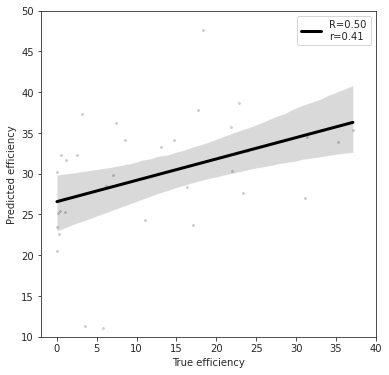

In [183]:
X = Anzalone_PE3[features]
y = Anzalone_PE3[target]
final_model,_ = xgb_reg(best_parameter_list[0])
final_model.fit(X,y)

df_X_test = df[features]
df_y_test = df['Target']
myPred = final_model.predict(df_X_test)
my_pred = [0 if i < 0 else i for i in myPred.tolist()]
my_true = df_y_test.tolist()
index_list = df_X_test.index.tolist()
outer_df = pd.DataFrame()
outer_df['true'] = my_true
outer_df['pred'] = my_pred
outer_df.index = index_list
r,p = scipy.stats.pearsonr(my_true,my_pred)
sr,p = scipy.stats.spearmanr(my_true,my_pred)
print ("Pearson correlation: %s"%(r))
print ("Spearman correlation: %s"%(sr))

%matplotlib inline
def plot_ML_scatter2(my_true,my_pred,output_file):
	outer_df = pd.DataFrame()
	outer_df['true'] = my_true
	outer_df['pred'] = my_pred
	sns.set_style("ticks")
	plt.figure(figsize=(6,6))
	r,p = scipy.stats.pearsonr(my_true,my_pred)
	sr,p = scipy.stats.spearmanr(my_true,my_pred)
	x="true"
	y='pred'
	linewidth=3
	sns.regplot(data=outer_df,x=x,y=y,scatter=True,scatter_kws={'alpha':0.3,'s':4,"color":"grey"},
				line_kws={'linewidth':linewidth,'color':'black'},fit_reg=True)
	plt.legend(['R=%.2f\nr=%.2f'%(sr,r)])
	plt.xlim(-2,40)
	plt.ylim(10,50)
	plt.xlabel("True efficiency")
	plt.ylabel("Predicted efficiency")
	plt.savefig("%s.corr.scatter.pdf"%(output_file),bbox_inches='tight')


plot_ML_scatter2(my_true,my_pred,"PE3_model.PrimeDesign20")

In [241]:
ss.abs().mean(0).sort_values(ascending=False).to_csv("PE3.model.importace.csv")

cas9_score          3.660825
nick_to_pegRNA      2.598073
dPAM                2.896905
PE3b                0.008457
RTT_GC              1.055571
RTT_length          0.889982
PBS_GC              0.385020
PBS_length          0.159195
N_subsitution       1.081351
N_deletion          0.282324
N_insertions        0.027765
Target_pos          2.233869
Target_end_flank    0.732190
RNA_Folding         7.507430
dtype: float64


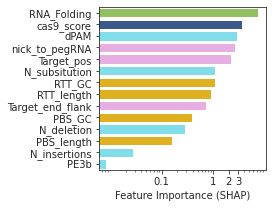

In [239]:
ss = pd.DataFrame(shap_values.values)
ss.columns = X.columns.tolist()
plot_df = ss.abs().mean(0)
plot_df
color_dict={}
color_dict["Oligo Features"] = "#FFC000"
color_dict["RNA Folding Features"] = "#92D050"
color_dict["Position Features"] = "#F1A4E8"
color_dict["Mutation Features"] = "#6EEBFB"
color_dict["Cas9 Activity Feature"] = "#2F5597"
feature_type_dict = {}
feature_type_dict["PBS_GC"] = "Oligo Features"
feature_type_dict["RTT_GC"] = "Oligo Features"
feature_type_dict["PBS_length"] = "Oligo Features"
feature_type_dict["RTT_length"] = "Oligo Features"
feature_type_dict["nick_to_pegRNA"] = "Position Features"
feature_type_dict["Target_pos"] = "Position Features"
feature_type_dict["Target_end_flank"] = "Position Features"
feature_type_dict["dPAM"] = "Mutation Features"
feature_type_dict["PE3b"] = "Mutation Features"
feature_type_dict["N_subsitution"] = "Mutation Features"
feature_type_dict["N_deletion"] = "Mutation Features"
feature_type_dict["N_insertions"] = "Mutation Features"
feature_type_dict["cas9_score"] = "Cas9 Activity Feature"
feature_type_dict["RNA_Folding"] = "RNA Folding Features"





RNA_folding = plot_df.loc[[str(x) for x in range(10)]].sum()
plot_df = plot_df.iloc[10:]
plot_df = plot_df.append(pd.Series([RNA_folding],index=["RNA_Folding"]))
print (plot_df)
plot_df = plot_df.reset_index()
plot_df.columns = ['Name','SHAP']
plot_df['feature_type']= plot_df.Name.map(feature_type_dict)
plot_df['color']= plot_df.feature_type.map(color_dict)
# print (plot_df)
plot_df.index = plot_df['Name'].tolist()
plot_df = plot_df.sort_values("SHAP",ascending=False)
plt.figure(figsize=(3,3))
# df['SHAP']=0
ax=sns.barplot(data=plot_df,y="Name",x="SHAP",palette=plot_df.color.to_dict(),alpha=1)
# plt.xticks(rotation=90) 
# plt.yticks(rotation=90) 
plt.xlabel("Feature Importance (SHAP)")
plt.ylabel("")
# plt.xlim(0.0005,0.12)
ax.set_xscale("log")
ax.set_xticks([0.1,1, 2,3])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_xticklabels(["0.1","1","2","3"])

# plt.savefig("feature_importance_PE3.pdf",bbox_inches="tight")
plt.savefig("feature_importance_PE3.eps",bbox_inches="tight")

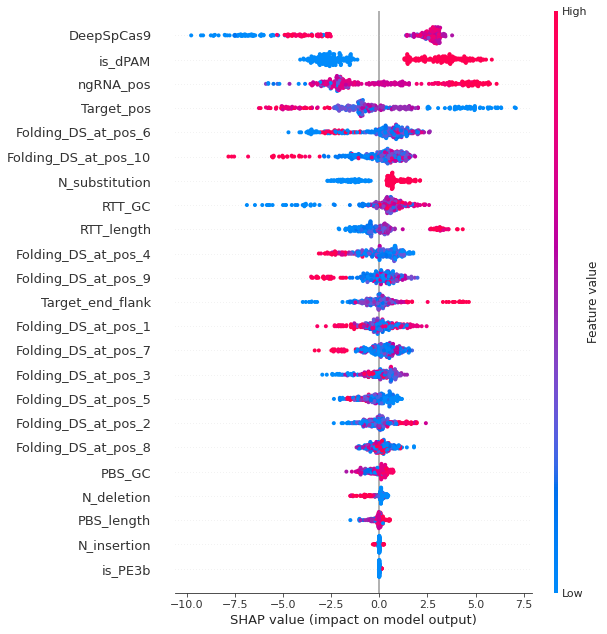

In [270]:
shap.plots.beeswarm(shap_values,max_display=100)
# locs, labels = plt.yticks()
output_file="PE3_model"
plt.savefig("%s.SHAP.beeswarm.pdf"%(output_file),bbox_inches='tight')

In [269]:
shap_values.feature_names = ['Folding_DS_at_pos_1',
 'Folding_DS_at_pos_2',
 'Folding_DS_at_pos_3',
 'Folding_DS_at_pos_4',
 'Folding_DS_at_pos_5',
 'Folding_DS_at_pos_6',
 'Folding_DS_at_pos_7',
 'Folding_DS_at_pos_8',
 'Folding_DS_at_pos_9',
 'Folding_DS_at_pos_10',
 'DeepSpCas9',
 'ngRNA_pos',
 'is_dPAM',
 'is_PE3b',
 'RTT_GC',
 'RTT_length',
 'PBS_GC',
 'PBS_length',
 'N_substitution',
 'N_deletion',
 'N_insertion',
 'Target_pos',
 'Target_end_flank']

In [268]:
from copy import deepcopy as dp
t = dp(shap_values)

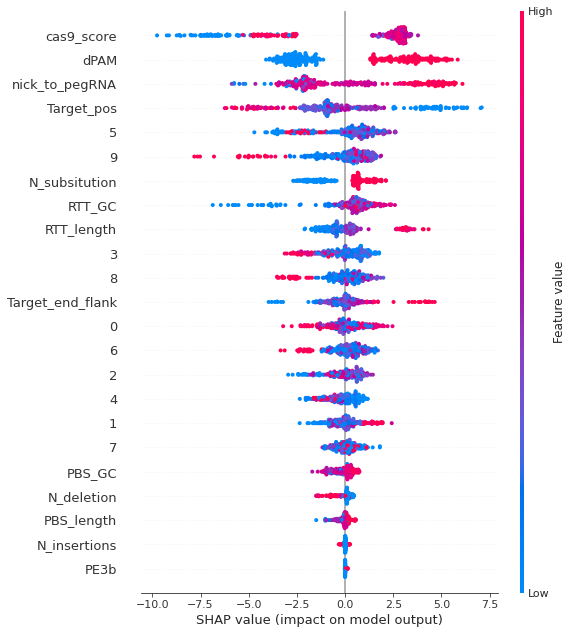

<Figure size 432x288 with 0 Axes>

In [186]:
explainer = shap.Explainer(final_model)
shap_values = explainer(pd.concat([X,df_X_test]))
shap.plots.beeswarm(shap_values,max_display=100)
output_file="PE3_model"
plt.savefig("%s.SHAP.beeswarm.pdf"%(output_file),bbox_inches='tight')

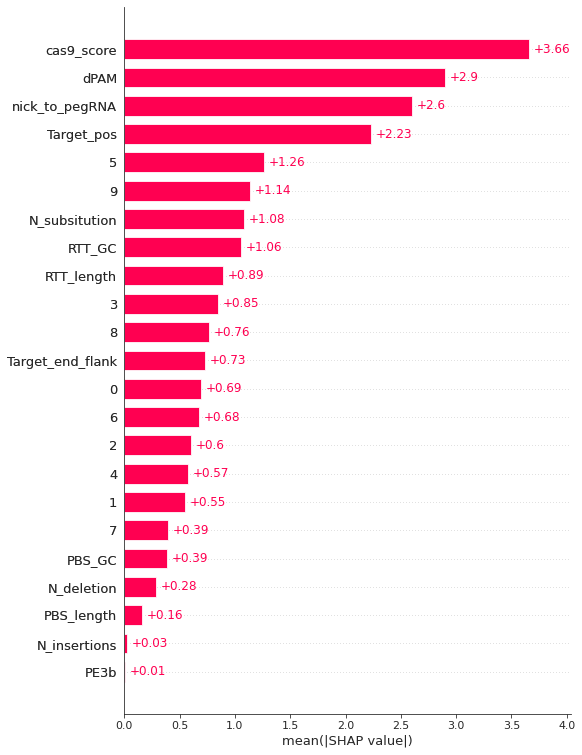

<Figure size 432x288 with 0 Axes>

In [187]:
shap.plots.bar(shap_values.abs.mean(0),max_display=100)
plt.savefig("%s.SHAP.barplot.pdf"%(output_file),bbox_inches='tight')